In [349]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle

In [304]:
car = pd.read_csv('data.csv')
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [305]:
car.info()             
# Below code there is null values in the 4th and 5th index...so we have to handle that
# Also there is object data type in the price and year column which should be number or digit
# Kms_driven should be also converted into numeric type so we can process on it 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


**PROBLEMS IN DATASET**
* once we ran unique() on the year column we found unusefull values over there 
* We have to change year to numeric not object..
* There is issue in Price column as well as there is data is some random string not number
* KMS_driven also have petrol value in that and also there is some NaN values 
* convert this column into just number no , or kms 
* removing NaN values in Kms_drive
* removing NaN values from fuel_type
* Name is too large so we will keep the first three words

**CLEANING**

In [306]:
backup = car.copy()

# Removing ununsefull values from year and convert that into int
car = car[car['year'].str.isnumeric()]
car['year'] = car['year'].astype(int)

In [307]:
# Removing Ask for price value from the price column
car = car[car['Price'] != 'Ask For Price']

In [308]:
# Removing the , from the price and making it integer
car['Price'] = car['Price'].apply(lambda x : int(x.replace(",","")))

In [309]:
# Removing the Petrol Keyword from the Kms_driven
car = car[car['kms_driven'] != 'Petrol']

In [310]:
# Removing Kms and , from value and then convert them into int value
car['kms_driven'] = car['kms_driven'].apply(lambda x :  int(x.replace("kms","").replace("," , "")))

In [311]:
car.info() # This shows that there is a null value in fuel type so we have to remove that 

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


In [312]:
car.dropna(inplace=True)

In [313]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.6+ KB


In [314]:
# Keeping the First Three names of the Name column
# def modified_name(obj):
#     l = obj.split()
#     name = []
#     run_for = 0
#     if len(l) < 3:
#         run_for = len(l)
#     else:
#         run_for = 3
    
#     for i in range(0,run_for):
#         name.append(l[i])
    
#     print(name)

# modified_name(car['name'][6])                               # This is logic below is the easy version of it 
car['name'] = car['name'].apply(lambda x : " ".join(x.split()[:3]))         # Little Trickly but try it 

In [315]:
car.sample(10)

,name,company,year,Price,kms_driven,fuel_type
353,Toyota Etios Liva,Toyota,2011,239999,41000,Petrol
205,Tata Sumo Victa,Tata,2012,285000,65000,Diesel
469,Toyota Corolla H2,Toyota,2003,150000,100000,Petrol
27,Maruti Suzuki Vitara,Maruti,2016,290000,15975,Diesel
500,Maruti Suzuki Wagon,Maruti,2014,250000,18500,Petrol
738,Hyundai Creta 1.6,Hyundai,2019,1200000,0,Petrol
438,Hyundai i20 Magna,Hyundai,2010,195000,36000,Petrol
119,Maruti Suzuki Ritz,Maruti,2013,399999,33000,Diesel
595,Hyundai Eon Magna,Hyundai,2013,185000,23000,Petrol
548,Hyundai Getz Prime,Hyundai,2009,115000,20000,Petrol


<Axes: xlabel='fuel_type'>

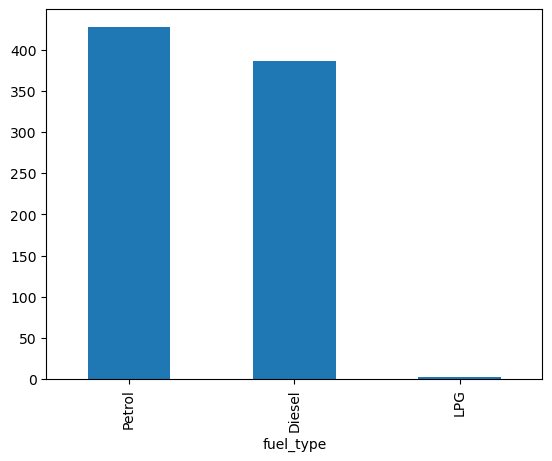

In [316]:
car['fuel_type'].value_counts().plot(kind='bar')

In [317]:
car           # So here index is very unusual so we have to change it to constant increasing not like random 1-3-4-6

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [318]:
car.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [319]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


CHECKING FOR OUTLIERS

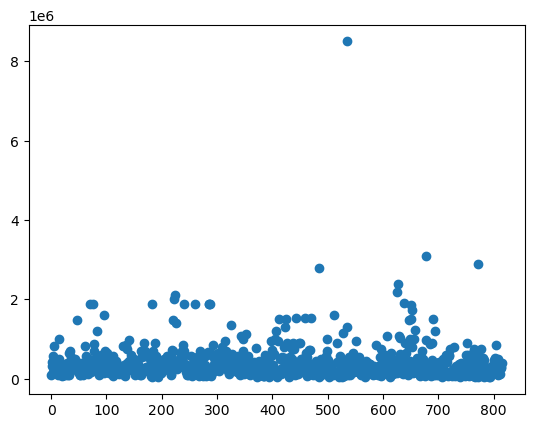

In [320]:
plt.scatter(range(len(car['Price'])) , car['Price'])         # So here there is an outlier which is 85 lakhs

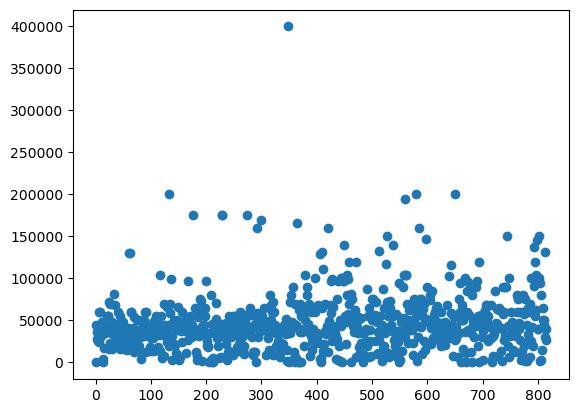

In [321]:
plt.scatter(range(len(car['kms_driven'])) , car['kms_driven'])  # Another Outlier is here so we have to remove that

In [322]:
car = car.reset_index(drop=True)

In [323]:
car = car[car['Price'] < 6000000]

In [324]:
car = car[car['kms_driven'] < 350000]

In [325]:
car = car.reset_index(drop=True)

In [326]:
car 

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
809,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
810,Tata Indica V2,Tata,2009,110000,30000,Diesel
811,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
812,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [327]:
# Saving the Cleaned CSV
car.to_csv('Cleaned_data.csv')

**MODEL**

In [328]:
x = car.drop(columns=['Price'])
y = car['Price']

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [330]:
ohe = OneHotEncoder()
ohe.fit(x[['name','company','fuel_type']])

,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,min_frequency,None
,max_categories,None
,feature_name_combiner,'concat'


In [331]:
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_) , ['name' , 'company' , 'fuel_type']),
    remainder='passthrough'
)
# So the main reason of passing ohe.categories here is that we have all category in x not in x_train lets say we pass
# a data which is not in x_train but in x so it will throw error as category is not found so that is the reason
# for doing the first fit only and here we are just passing the categories to onehotencoder....
lr = LinearRegression()

pipe = make_pipeline(column_trans , lr)
pipe.fit(x_train , y_train)

,steps,"[('columntransformer', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('onehotencoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [332]:
y_pred = pipe.predict(x_test)

In [335]:
print("R2 Score is :- " , r2_score(y_test,y_pred))

R2 Score is :-  0.5258602556868547


In [345]:
temp = []
for i in range(1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans , lr)
    pipe.fit(x_train , y_train)
    y_pred = pipe.predict(x_test)
    #print("R2 Score is :- " , r2_score(y_test,y_pred) , " :- " , i)
    temp.append(r2_score(y_test,y_pred))

In [346]:
highest = max(temp)
index_of_highest = temp.index(highest)
index_of_highest , highest

(433, 0.8541072997265182)

In [348]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=433)
lr = LinearRegression()
pipe = make_pipeline(column_trans , lr)
pipe.fit(x_train , y_train)
y_pred = pipe.predict(x_test)
print("R2 Score is :- " , r2_score(y_test,y_pred))

R2 Score is :-  0.8541072997265182


In [350]:
pickle.dump(pipe , open("lrm.pkl" , 'wb'))

In [390]:
new_data = pd.DataFrame([{
    'name': 'Maruti Suzuki Swift',
    'company': 'Maruti',
    'year': 2000,
    'kms_driven': 1000,
    'fuel_type': 'Petrol'
}])
pipe.predict(new_data)

array([38084.32344595])

In [361]:
company_list = car['company'].unique().tolist()

In [370]:
fuel_type_list = car['fuel_type'].unique().tolist()

In [371]:
car_model_list = car['name'].unique().tolist()

In [372]:
dict_of_item = {
    "company_list" : company_list,
    "fuel_type_list" : fuel_type_list,
    "car_model_list" : car_model_list
}

In [380]:
pickle.dump(dict_of_item , open("dict_data.pkl" , "wb"))

In [382]:
car['year'].describe()

count     814.000000
mean     2012.445946
std         4.006625
min      1995.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2019.000000
Name: year, dtype: float64